# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import sys
sys.path.append('../../MONET-analysis/melodies_monet/')
import driver

/home/rschwantes/anaconda3/envs/py36_monet_default/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:50: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


Please install h5py to open files from the Amazon S3 servers.
Please install h5netcdf to open files from the Amazon S3 servers.


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = 'control_wrfchem_mech-0905_2.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-09-05-06:00:00',
  'end_time': '2019-09-06-06:00:00',
  'output_dir': '/wrk/d2/rschwantes/wrf/firex_mech/wrfchem_example/process/short_file/',
  'debug': True},
 'model': {'RACM_ESRL': {'files': '/wrk/d2/rschwantes/wrf/firex_mech/wrfchem_example/small/racm_esrl/*',
   'mod_type': 'wrfchem',
   'mod_kwargs': {'mech': 'racm_esrl_vcp'},
   'radius_of_influence': 12000,
   'mapping': {'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'magenta', 'marker': 's', 'linestyle': '-'}},
  'RACM_ESRL_VCP': {'files': '/wrk/d2/rschwantes/wrf/firex_mech/wrfchem_example/small/racm_esrl_vcp/*',
   'mod_type': 'wrfchem',
   'mod_kwargs': {'mech': 'racm_esrl_vcp'},
   'radius_of_influence': 12000,
   'mapping': {'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'gold', 'marker': 'o', 'linestyle': '-'}}},
 'obs': {'airnow': {'use_airnow': True,
   'filename': '/home/rs

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

RACM_ESRL
{'files': '/wrk/d2/rschwantes/wrf/firex_mech/wrfchem_example/small/racm_esrl/*', 'mod_type': 'wrfchem', 'mod_kwargs': {'mech': 'racm_esrl_vcp'}, 'radius_of_influence': 12000, 'mapping': {'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'magenta', 'marker': 's', 'linestyle': '-'}}
/wrk/d2/rschwantes/wrf/firex_mech/wrfchem_example/small/racm_esrl/*
RACM_ESRL_VCP
{'files': '/wrk/d2/rschwantes/wrf/firex_mech/wrfchem_example/small/racm_esrl_vcp/*', 'mod_type': 'wrfchem', 'mod_kwargs': {'mech': 'racm_esrl_vcp'}, 'radius_of_influence': 12000, 'mapping': {'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'gold', 'marker': 'o', 'linestyle': '-'}}
/wrk/d2/rschwantes/wrf/firex_mech/wrfchem_example/small/racm_esrl_vcp/*


In [5]:
an.models

{'RACM_ESRL': <driver.model at 0x7f6cc88d00b8>,
 'RACM_ESRL_VCP': <driver.model at 0x7f6c7f859e48>}

In [6]:
an.models['RACM_ESRL'].obj

<xarray.Dataset>
Dimensions:        (time: 31, x: 440, y: 284, z: 50)
Coordinates:
    longitude      (y, x) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    latitude       (y, x) float32 21.19 21.22 21.24 21.27 ... 50.28 50.24 50.2
  * time           (time) datetime64[ns] 2019-09-05 ... 2019-09-06T06:00:00
Dimensions without coordinates: x, y, z
Data variables:
    PM2_5_DRY      (time, z, y, x) float32 3.046 3.048 2.84 ... 0.654 0.6544
    o3             (time, z, y, x) float32 30.0 30.0 ... 3.149e+03 3.149e+03
    pres_pa_mid    (time, z, y, x) float32 1.007e+05 1.007e+05 ... 5.584e+03
    alt_msl_m_mid  (time, z, y, x) float32 11.4 11.39 ... 2.016e+04 2.016e+04
    temperature_k  (time, z, y, x) float32 297.0 296.9 296.8 ... 220.5 220.4
    alt_agl_m_mid  (time, z, y, x) float32 11.41 11.4 ... 2.015e+04 2.016e+04
    surfpres_pa    (time, y, x) float32 1.008e+05 1.008e+05 ... 1.007e+05
Attributes:
    TRUELAT1:                  33.0
    TRUELAT2:                  45.0
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

In [7]:
#All the info in the model class can be called here.
print(an.models['RACM_ESRL'].label)
print(an.models['RACM_ESRL'].mapping)

RACM_ESRL
{'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}}


In [8]:
#All the info in the analysis class can also be called.
print(an.start_time)
print(an.end_time)

2019-09-05 06:00:00
2019-09-06 06:00:00


### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [9]:
an.open_obs()

In [10]:
#All the info in the observation class can also be called.
an.obs['airnow'].obj

<xarray.Dataset>
Dimensions:     (time: 2091, x: 3786, y: 1)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 ... 3779 3780 3781 3782 3783 3784 3785
  * time        (time) datetime64[ns] 2019-09-01 ... 2019-09-30T00:30:00
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    siteid      (y, x) object ...
Dimensions without coordinates: y
Data variables:
    BARPR       (time, y, x) float64 ...
    BC          (time, y, x) float64 ...
    CO          (time, y, x) float64 ...
    NO          (time, y, x) float64 ...
    NO2         (time, y, x) float64 ...
    NO2Y        (time, y, x) float64 ...
    NOX         (time, y, x) float64 ...
    NOY         (time, y, x) float64 ...
    OZONE       (time, y, x) float64 25.0 27.0 22.0 20.0 nan ... nan nan nan nan
    PM10        (time, y, x) float64 ...
    PM2.5       (time, y, x) float64 nan 8.0 nan nan 4.0 ... nan nan nan nan nan
    PRECIP      (time, y, x) float64 ...
    RHUM        (time, y, x) float64 ...
    RWD         (time, y, x) float64 ...
    RWS         (time, y, x) float64 ...
    SO2         (time, y, x) float64 ...
    SRAD        (time, y, x) float64 ...
    TEMP        (time, y, x) float64 ...
    UV-AETH     (time, y, x) float64 ...
    WD          (time, y, x) float64 ...
    WS          (time, y, x) float64 ...
    site        (y, x) object ...
    utcoffset   (y, x) int64 ...
    units       (y, x) object ...
    cmsa_name   (y, x) float64 ...
    msa_code    (y, x) float64 ...
    msa_name    (y, x) object ...
    state_name  (y, x) object ...
    epa_region  (y, x) object ...
    time_local  (time, y, x) datetime64[ns] ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-06-07

In [11]:
#This just pairs the data
an.pair_data()

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s


Reference std: 5.409628418207226
Reference std: 5.948273120791575
Reference std: 5.7216247821122055
Reference std: 16.454896847070792
Reference std: 19.26608907555366
Reference std: 18.26006528549407


/home/rschwantes/MONET/monet/monet/plots/mapgen.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=figsize, subplot_kw={"projection": crs})
/home/rschwantes/MONET/monet/monet/plots/mapgen.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=figsize, subplot_kw={"projection": crs})
/home/rschwantes/MONET/monet/monet/plots/mapgen.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

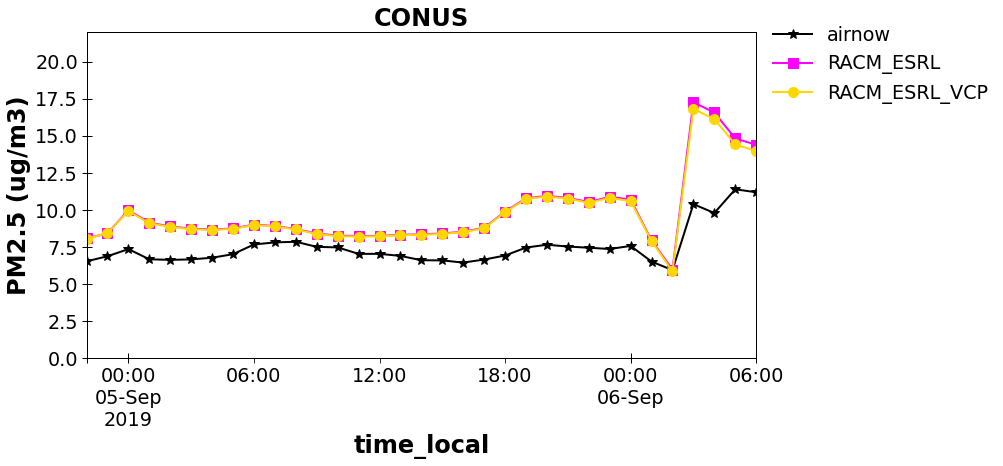

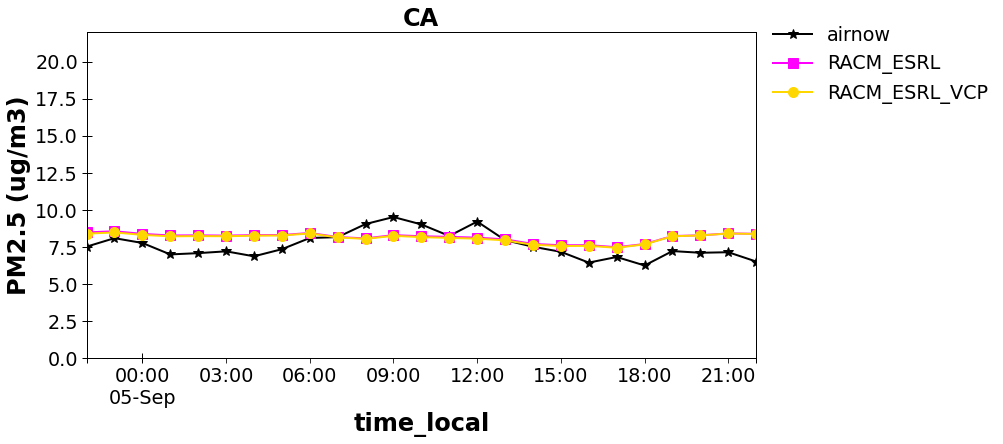

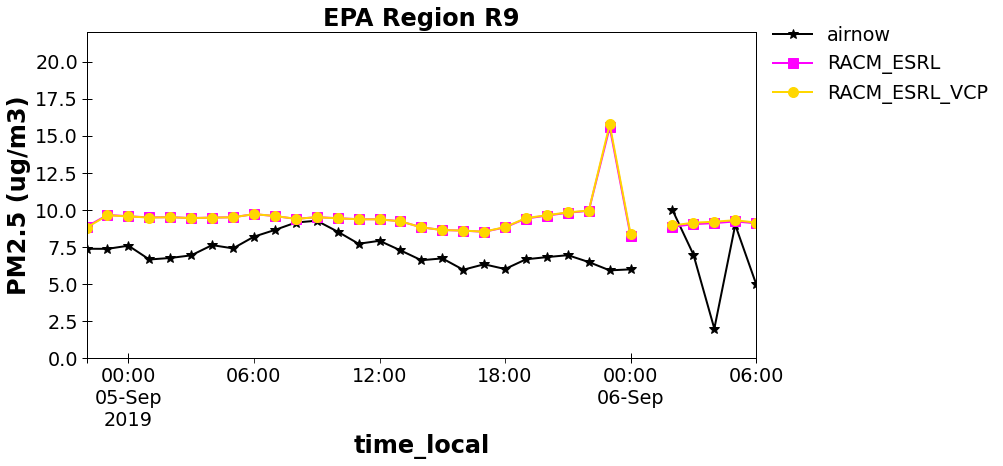

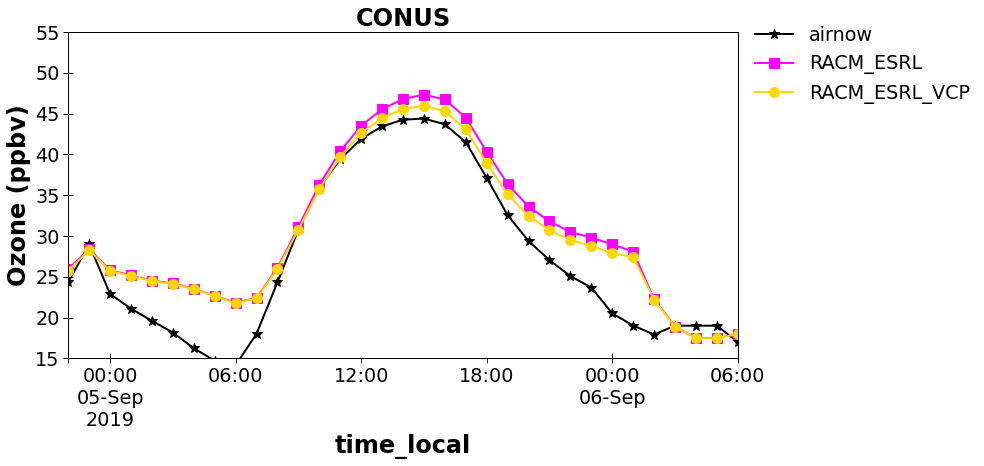

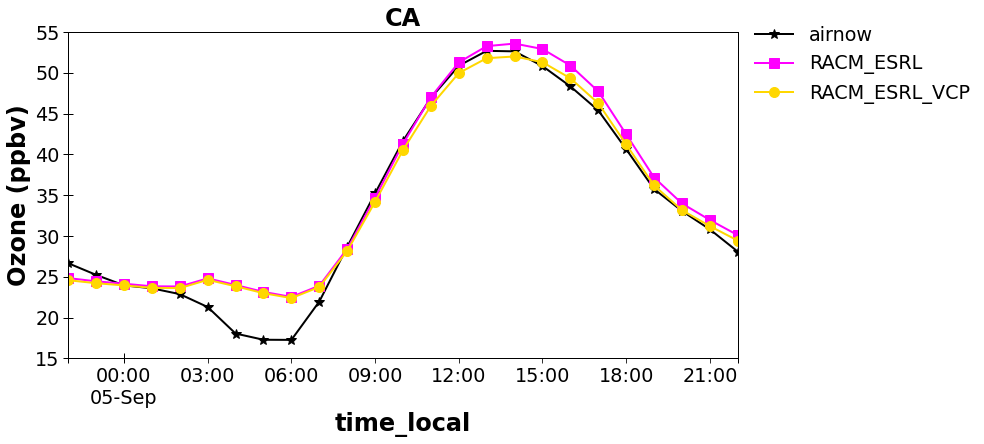

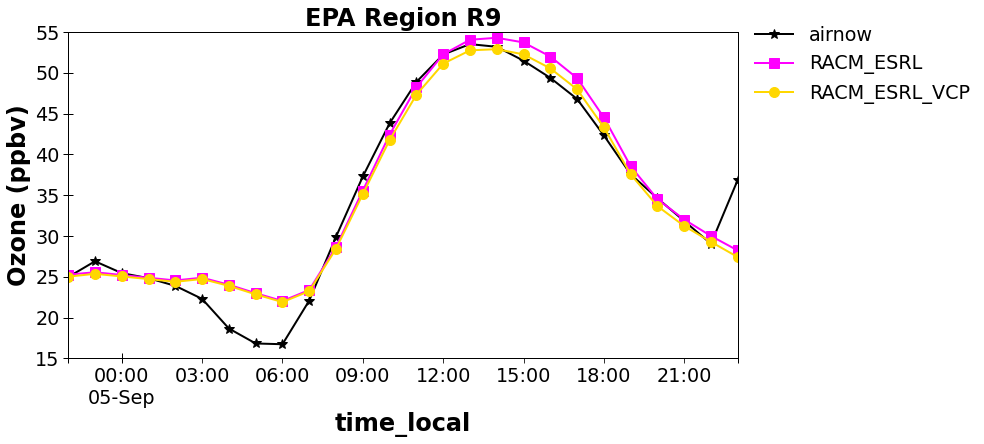

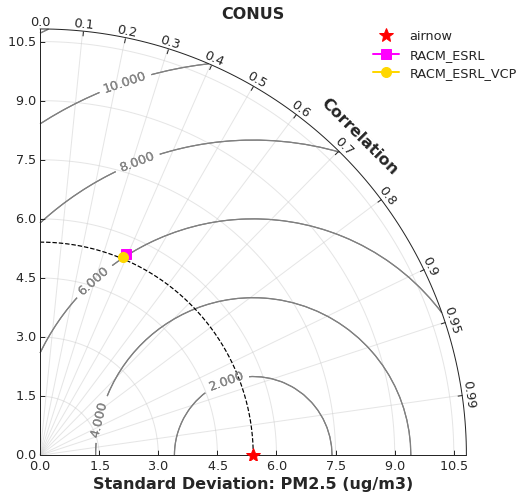

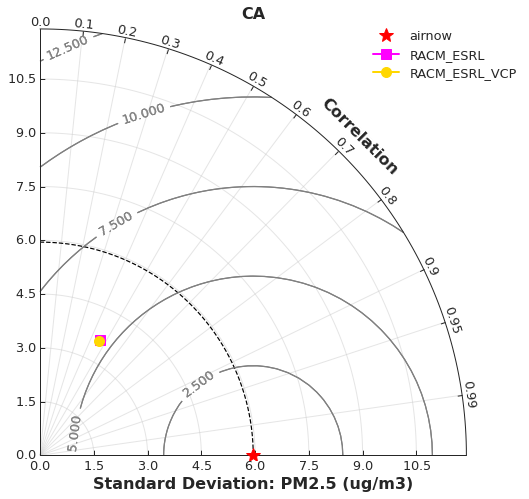

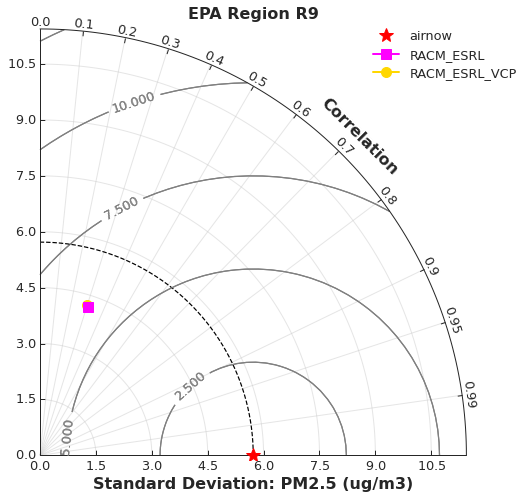

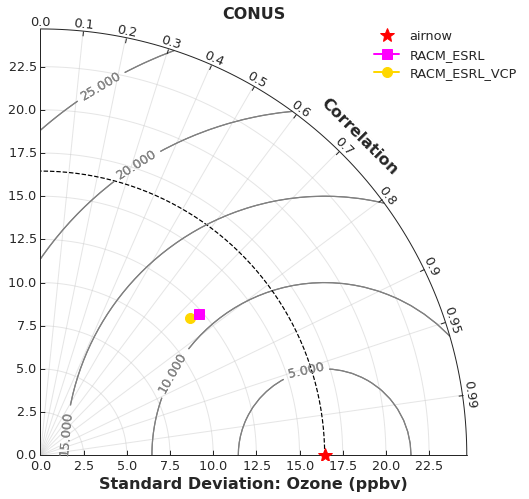

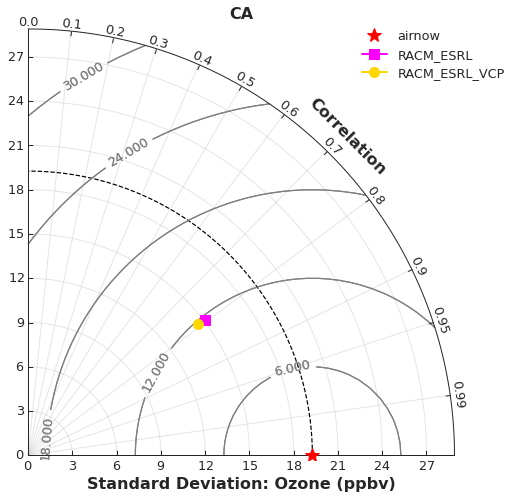

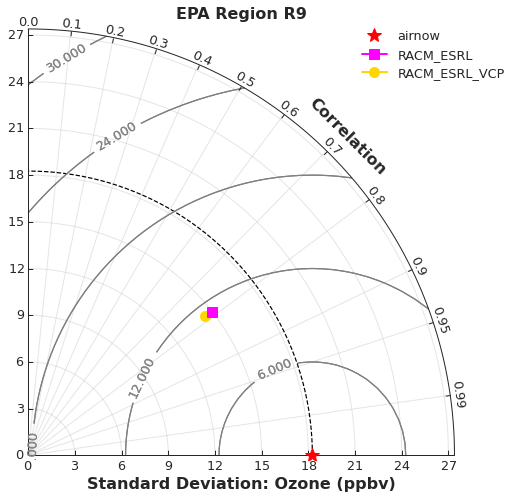

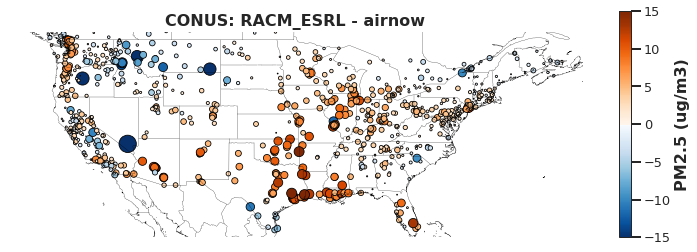

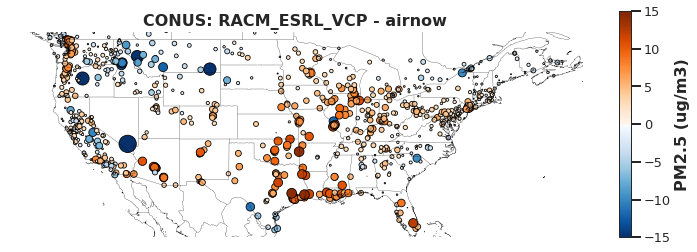

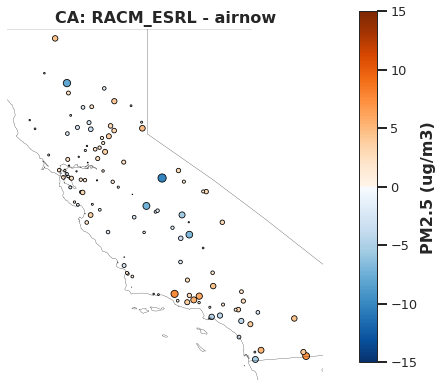

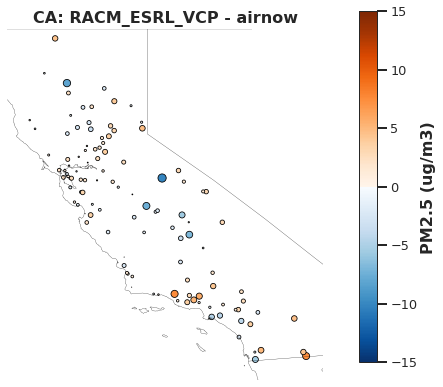

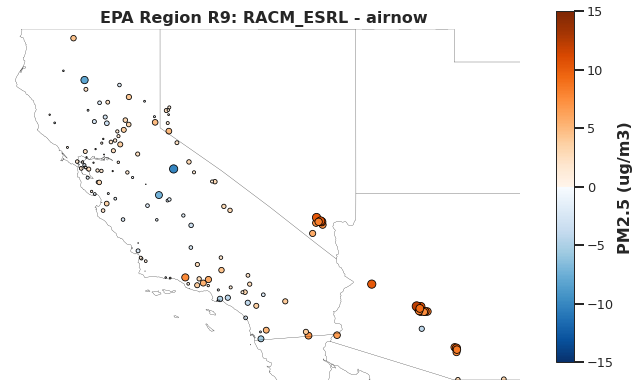

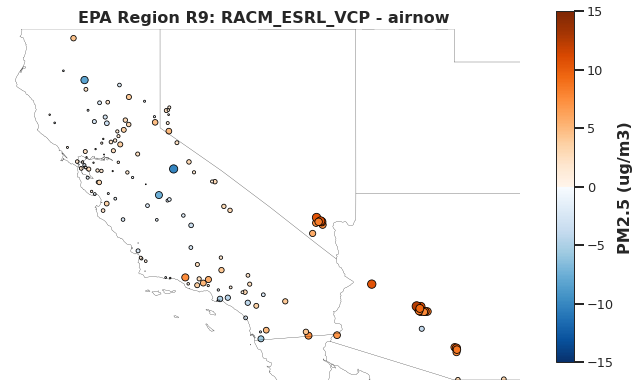

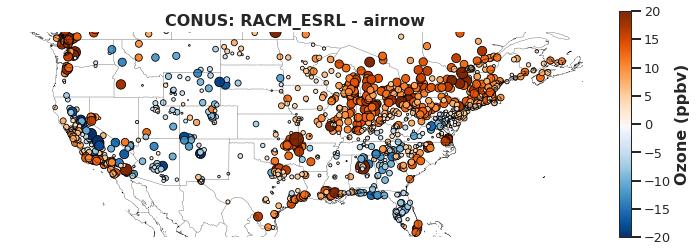

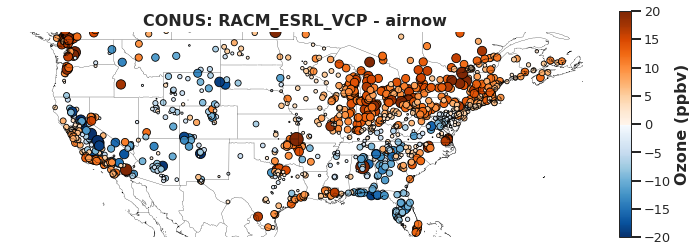

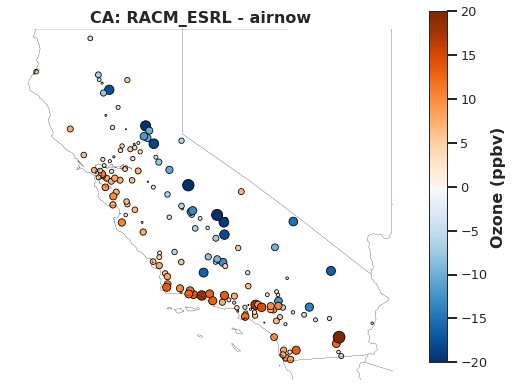

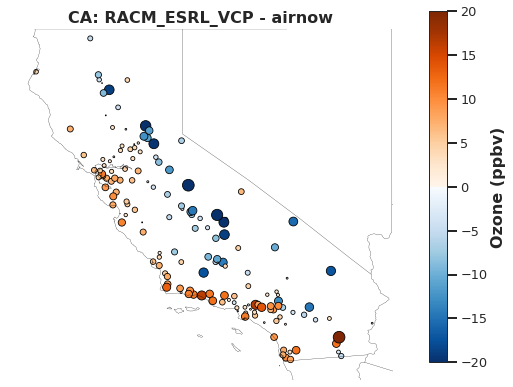

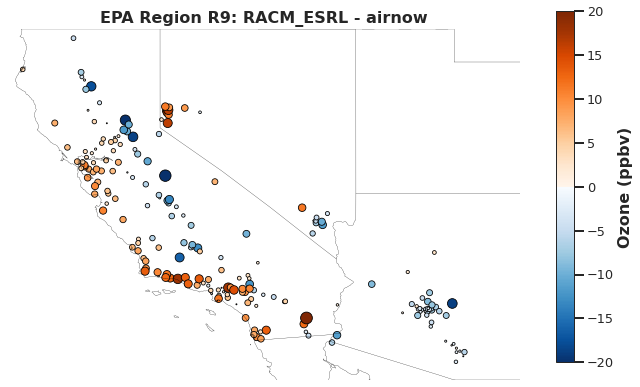

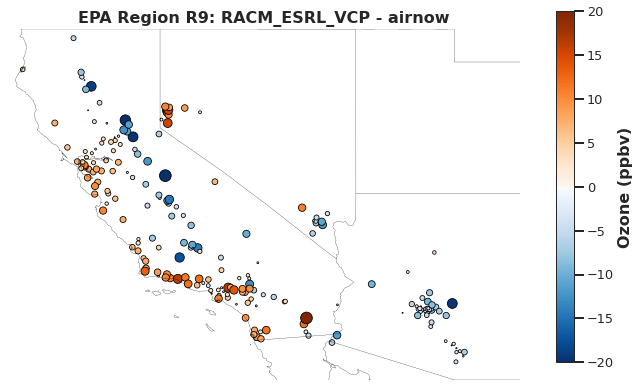

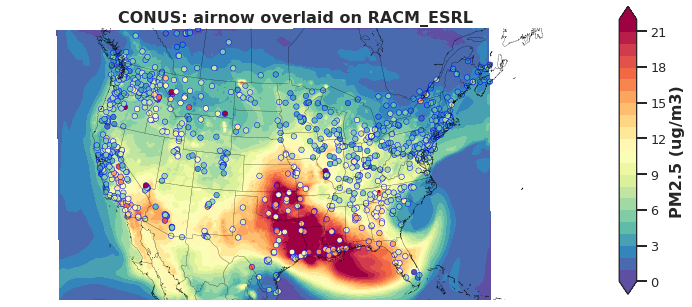

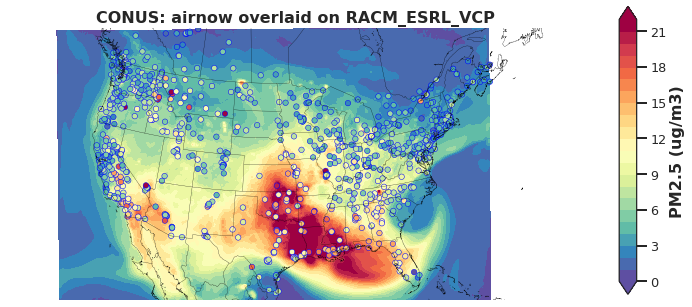

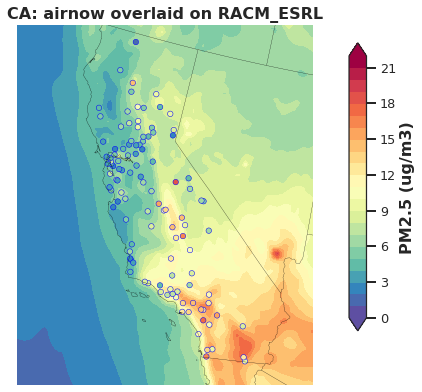

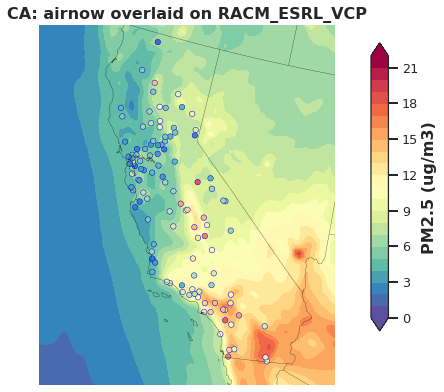

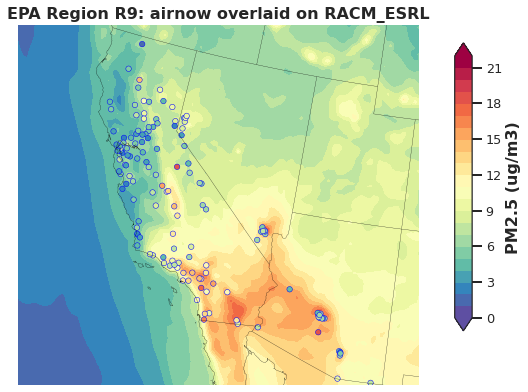

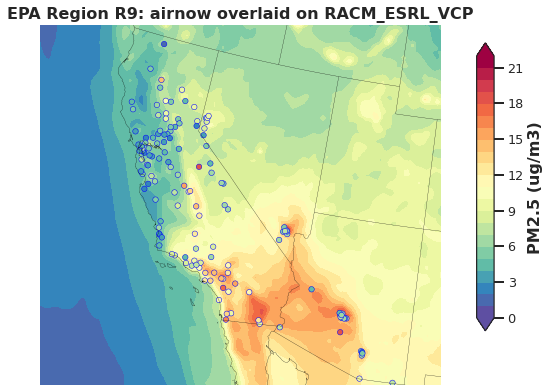

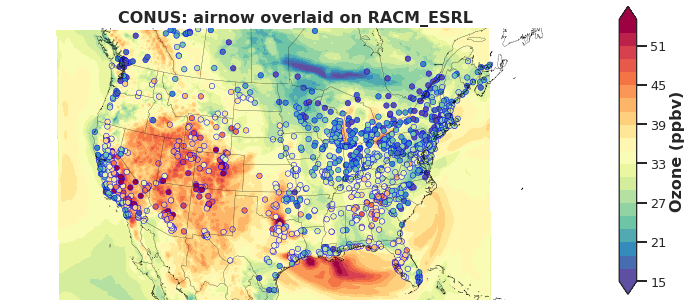

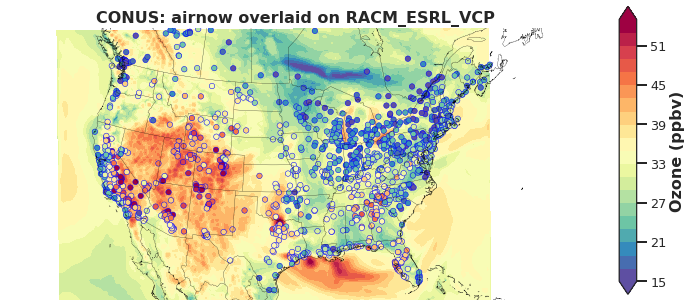

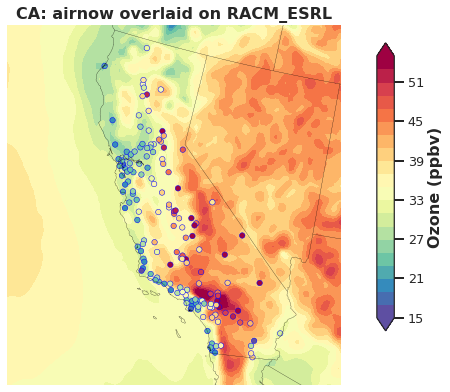

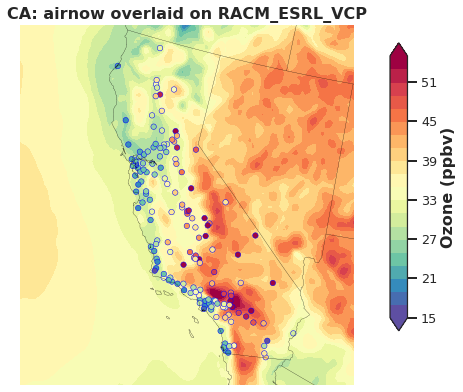

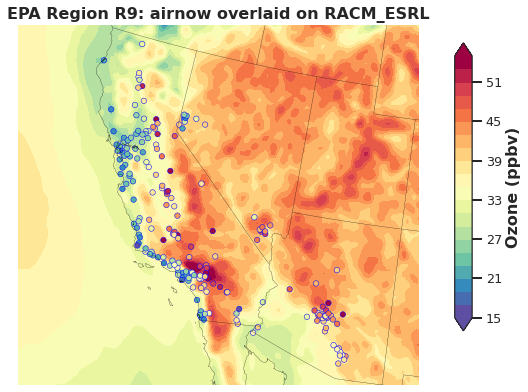

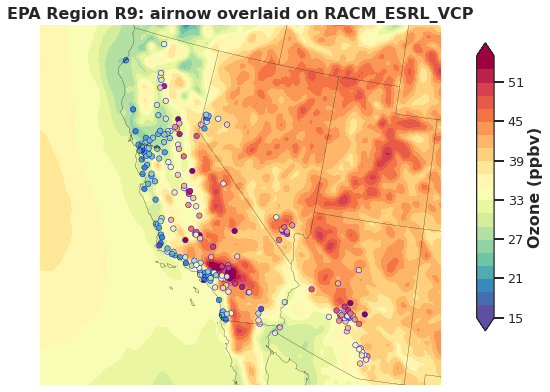

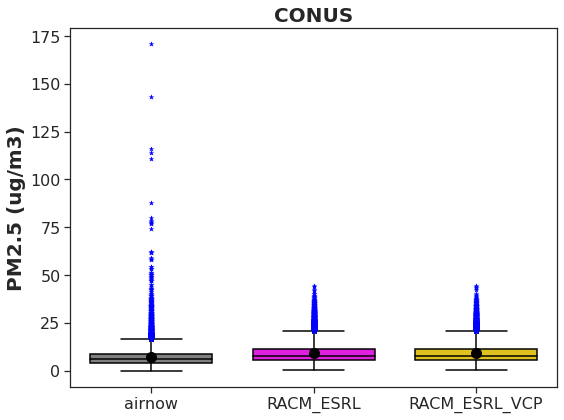

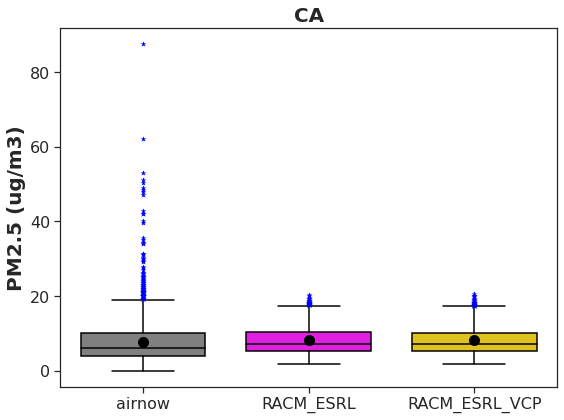

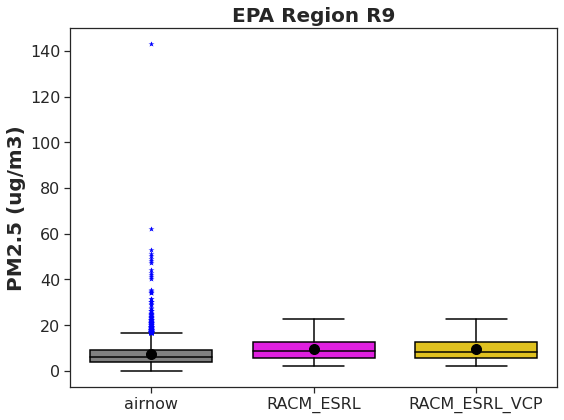

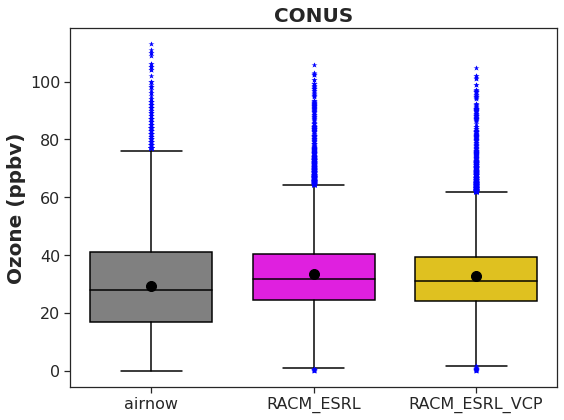

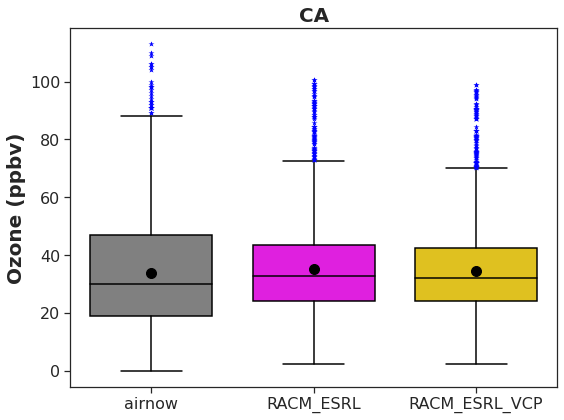

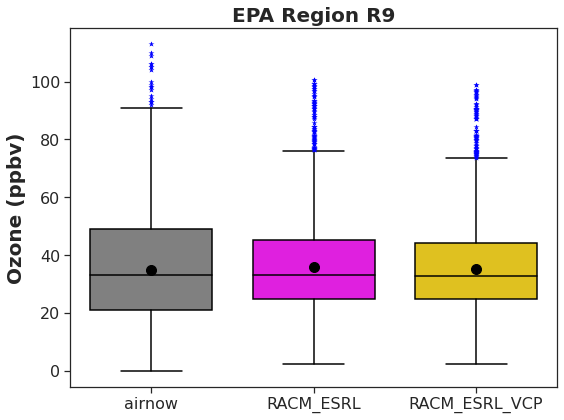

In [12]:
#And this generates all the plots.
an.plotting()